In [1]:
import numpy as np

X = np.load("./X.npy")
Y = np.load("./Y.npy")

from tsaug.visualization import plot

plot(X, Y)

In [2]:
from tsaug import TimeWarp, Crop, Quantize, Drift, Reverse

my_augmenter = (
    TimeWarp() * 5 
    + Crop(size=300)
    + Quantize(n_levels=[10, 20, 30])
    + Drift(max_drift=(0.1, 0.5)) @ 0.8
    + Reverse() @ 0.5
)

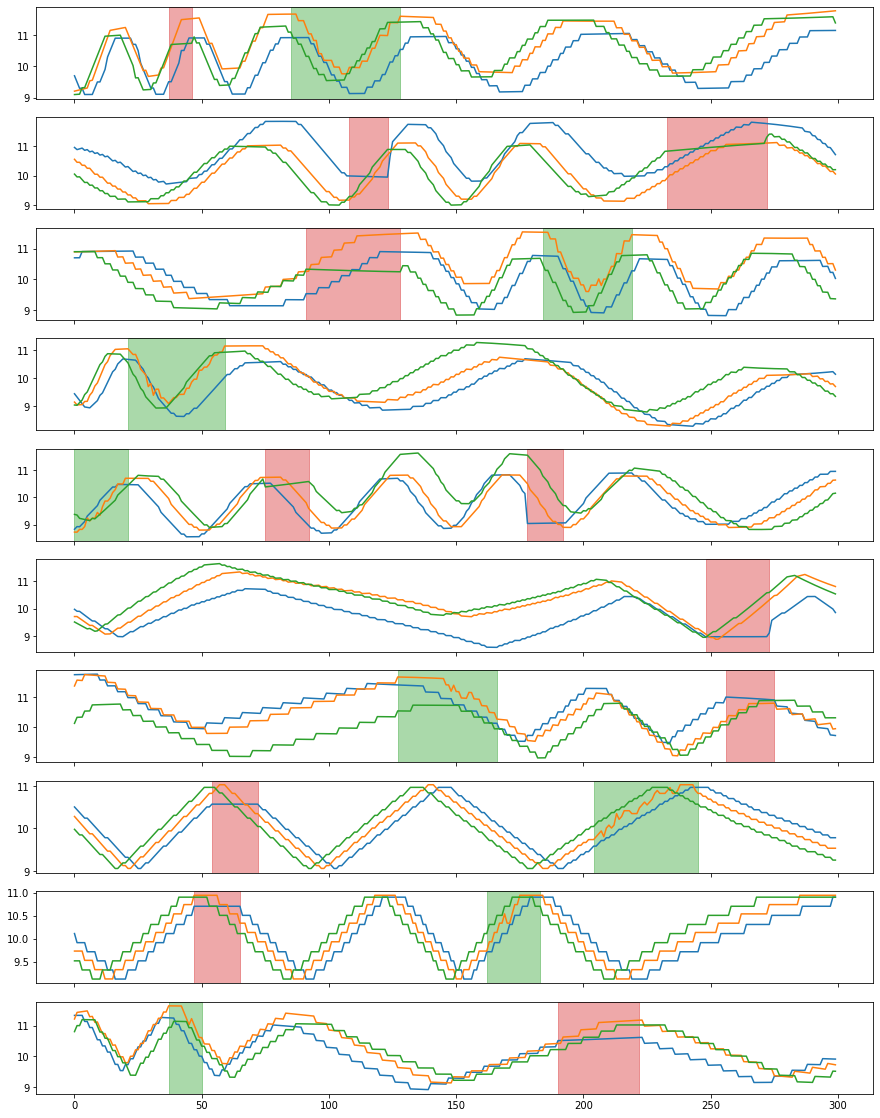

In [3]:
X_aug, Y_aug = my_augmenter.augment(X, Y)

plot(X_aug, Y_aug)

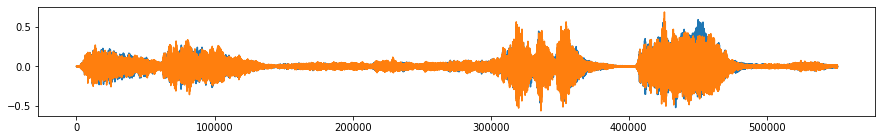

In [4]:
import librosa
from IPython.display import Audio

beethoven, samplerate = librosa.load("./beethoven.wav", mono=False)
beethoven = np.expand_dims(beethoven.swapaxes(0,1), 0) # reshape the numpy array to input of tsaug

plot(beethoven)

Audio(beethoven.reshape(-1, 2).T, rate=samplerate)

In [5]:
from tsaug import Crop, AddNoise, Dropout

my_augmenter = (
    Crop(size=samplerate * 10) * 5
    + AddNoise(scale=(0.01, 0.05)) @ 0.5
    + Dropout(
        p=0.1,
        fill=0,
        size=[int(0.002 * samplerate), int(0.005 * samplerate), int(0.01 * samplerate)],
    )
)

In [6]:
beethoven_aug = my_augmenter.augment(beethoven)

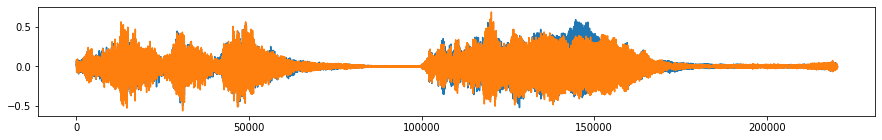

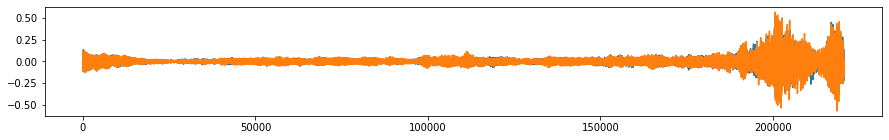

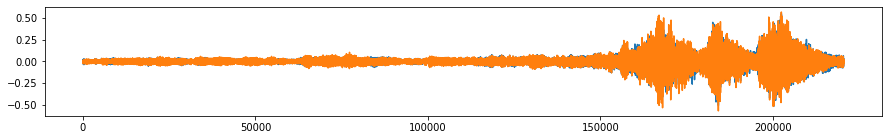

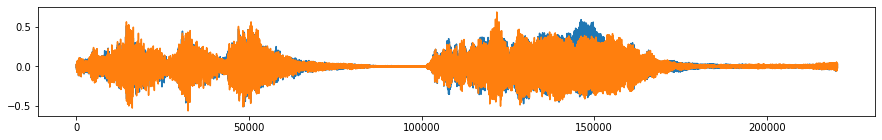

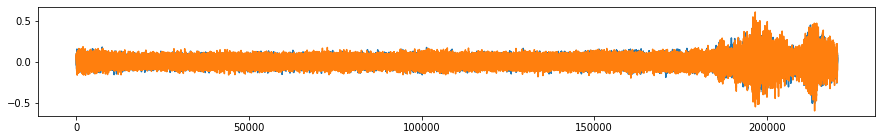

In [7]:
for i in range(5):
    plot(beethoven_aug[[i]])
#     Audio(beethoven_aug[i].reshape(-1, 2).T, rate=samplerate)

In [8]:
Audio(beethoven_aug[0].reshape(-1, 2).T, rate=samplerate)

In [9]:
Audio(beethoven_aug[1].reshape(-1, 2).T, rate=samplerate)

In [10]:
Audio(beethoven_aug[2].reshape(-1, 2).T, rate=samplerate)

In [11]:
Audio(beethoven_aug[3].reshape(-1, 2).T, rate=samplerate)

In [12]:
Audio(beethoven_aug[4].reshape(-1, 2).T, rate=samplerate)